In [13]:
import pandas as pd
import  numpy as np
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud
from pathlib import Path
from PIL import Image
from zipfile import ZipFile
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from langdetect import detect_langs

In [15]:
movie_reviews = pd.read_csv('movie_reviews.csv')
movie_reviews

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
...,...,...,...
7496,7334,Although this film is somewhat filled with eig...,1
7497,11638,Bo Derek's beauty and John Derek's revolutiona...,1
7498,19851,I have seen every episode of this spin off. I ...,0
7499,8114,"A comedy gem. Lots of laugh out loud moments, ...",1


In [1]:
movie_reviews['label'].value_counts(normalize=True)

NameError: name 'movie_reviews' is not defined

In [17]:
movie_reviews['review'].str.len()

0        667
1       2982
2        669
3        691
4       1087
        ... 
7496     633
7497     650
7498     654
7499     918
7500     336
Name: review, Length: 7501, dtype: int64

In [18]:
text = 'My name is Shakir Faiz. I have am currently taking a NLP course. I hate slow performances. I enjoy building thon. I love python'
txt_blob = TextBlob(text)
txt_blob.sentiment, txt_blob.sentiment_assessments

(Sentiment(polarity=-0.040000000000000015, subjectivity=0.56),
 Sentiment(polarity=-0.040000000000000015, subjectivity=0.56, assessments=[(['currently'], 0.0, 0.4, None), (['hate'], -0.8, 0.9, None), (['slow'], -0.30000000000000004, 0.39999999999999997, None), (['enjoy'], 0.4, 0.5, None), (['love'], 0.5, 0.6, None)]))

In [19]:
cloud = WordCloud()
cloud

In [49]:
from wordcloud import random_color_func, ImageColorGenerator
img = Image.open(Path("C:\\Users\HomePC\Pictures\\faiz_nin_back.png"))
# img
ImageColorGenerator(img)

AttributeError: 'PngImageFile' object has no attribute 'ndim'

(-0.5, 399.5, 199.5, -0.5)

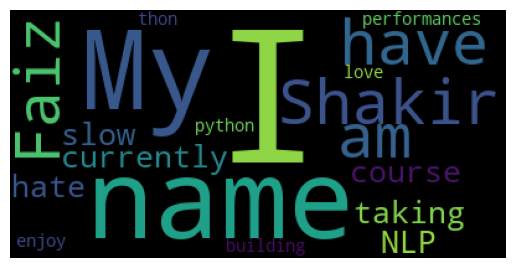

In [57]:
text_wc  = WordCloud(stopwords='am').generate(text)
plt.imshow(text_wc)
plt.axis('off')

In [99]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

(-0.5, 399.5, 199.5, -0.5)

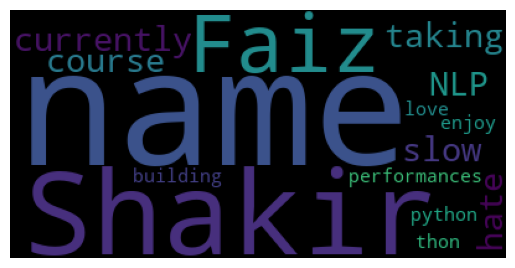

In [56]:
text_wc  = WordCloud(stopwords=en_stopwords).generate(text)
plt.imshow(text_wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

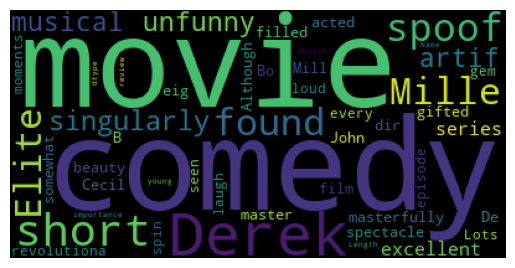

In [66]:
movies_wc = WordCloud(stopwords=en_stopwords, ).generate(str(movie_reviews.review))
plt.imshow(movies_wc)
plt.axis('off')

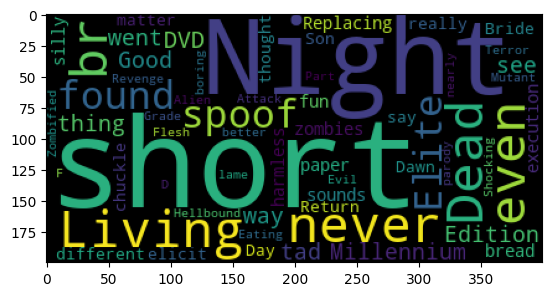

In [81]:
plt.imshow(WordCloud().generate(movie_reviews.review[0]))

In [2]:
with ZipFile("WhatsApp Chat with The Boys.zip") as f:
    f.extractall()
with open("WhatsApp Chat with The Boys.txt", "r", encoding='utf-8') as f:
    whatsapp_chat = f.read()

In [ ]:
re.match(r"[]", "")

In [111]:
tokenized_chat = sent_tokenize(whatsapp_chat)
tokenized_chat[5:10]

['No dressing moral at all\n13/06/2025, 13:33 - Big Sam: <Media omitted>\n13/06/2025, 13:33 - Big Sam: See Daniel😂😂\n13/06/2025, 13:34 - Daniel: Dis one wear bra to class kon dey adjust\n13/06/2025, 13:34 - BFA: Abeg.😹😹\n13/06/2025, 13:34 - Daniel: Dem suppose strip her idiot\n13/06/2025, 13:34 - BFA: Omo.',
 '13/06/2025, 13:34 - BFA: Is she light?',
 '13/06/2025, 13:34 - +234 703 561 5807: See bastard\n13/06/2025, 13:35 - Daniel: <Media omitted>\n13/06/2025, 13:35 - Daniel: Ode\n13/06/2025, 13:35 - Daniel: <Media omitted>\n13/06/2025, 13:35 - BFA: <Media omitted>\n13/06/2025, 13:36 - Daniel: <Media omitted>\n13/06/2025, 13:36 - BFA: What tf!!',
 '13/06/2025, 13:36 - BFA: Eyama.',
 "13/06/2025, 13:36 - BFA: I don't want jhor."]

In [3]:
whatsapp_df = pd.DataFrame()
extracted_dates = []
extracted_dates.append(re.findall(r"\d+/\d+/\d+", whatsapp_chat))

extracted_timestamps = re.findall(r"\d+:\d+", whatsapp_chat)
# whatsapp_df['date'] = extracted_dates
# whatsapp_df['timestamp'] = extracted_timestamps

In [143]:
len(extracted_timestamps), len(extracted_dates[0])

(16672, 16655)

In [4]:
entries = re.split(r'(?=\d{1,2}/\d{1,2}/\d{2,4},\s*\d{1,2}:\d{2}\s*-)', whatsapp_chat)

# ✅ Step 2: Extract date, time, sender, message
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}),\s*(\d{1,2}:\d{2})\s*-\s*([^:]+):\s*(.*)'

data = []
for entry in entries:
    match = re.match(pattern, entry.strip(), re.DOTALL)
    if match:
        date, time, sender, message = match.groups()
        data.append({
            "date": date,
            "time": time,
            "sender": sender,
            "message": message.strip()
        })

len(date), len(time), len(message)


(9, 5, 15)

In [5]:
all_dates = [data[num]['date'] for num in range(len(data))]
all_times = [data[num]['time'] for num in range(len(data))]
all_senders = [data[num]['sender'] for num in range(len(data))]
all_messages = [data[num]['message'] for num in range(len(data))]

In [6]:
whatsapp_df = pd.DataFrame({'date': all_dates, 'time': all_times, 'sender': all_senders, 'message': all_messages})
whatsapp_df

,date,time,sender,message
0,3/06/2025,11:33,Jordan,Waiting for this message
1,3/06/2025,11:36,Big Sam,<Media omitted>
2,3/06/2025,11:36,Big Sam,Jomi delete 😡
3,3/06/2025,11:37,+234 703 561 5807,Omo
4,3/06/2025,11:37,+234 703 561 5807,When did he post so fast?
...,...,...,...,...
16621,3/10/2025,19:24,D Bello,Omo first time sha
16622,3/10/2025,19:52,agbo ICT,Pele
16623,3/10/2025,19:53,agbo ICT,That one is normal
16624,4/10/2025,11:08,Afeez,Any game?


In [10]:
non_media_df = whatsapp_df[whatsapp_df['message'] != '<Media omitted>']
non_media_df

,date,time,sender,message
0,3/06/2025,11:33,Jordan,Waiting for this message
2,3/06/2025,11:36,Big Sam,Jomi delete 😡
3,3/06/2025,11:37,+234 703 561 5807,Omo
4,3/06/2025,11:37,+234 703 561 5807,When did he post so fast?
5,3/06/2025,11:37,+234 703 561 5807,😭
...,...,...,...,...
16620,3/10/2025,19:23,D Bello,Guy traffic wan wound me bro
16621,3/10/2025,19:24,D Bello,Omo first time sha
16622,3/10/2025,19:52,agbo ICT,Pele
16623,3/10/2025,19:53,agbo ICT,That one is normal


In [7]:
fig = px.bar(whatsapp_df['sender'].value_counts().sort_values(ascending=True), orientation='h')
fig.update_layout(xaxis_title='Number of messages')
# fig.update_legends(False)
fig.show()

(-0.5, 399.5, 199.5, -0.5)

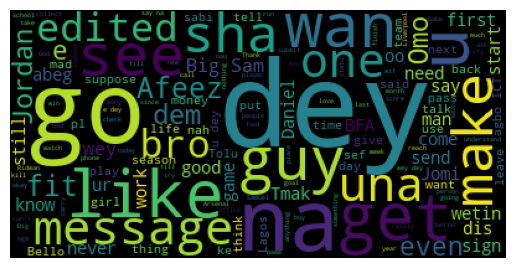

In [203]:
english_stopwords = stopwords.words('english')
all_non_media_msgs = ''.join(non_media_df['message'])
plt.imshow(WordCloud(stopwords=english_stopwords).generate(all_non_media_msgs))
plt.axis('off')

In [205]:
stopwords

<WordListCorpusReader in 'C:\\Users\\HomePC\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

(-0.5, 399.5, 199.5, -0.5)

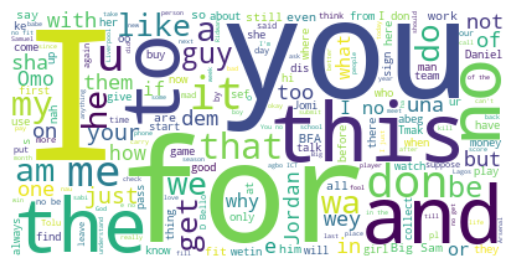

In [212]:
plt.imshow(WordCloud(stopwords=['dey', 'see', 'go', 'na', 'message', 'make', 'wan', 'Afeez', 'need', 'send', 'tell', 'never', 'edited', 'bro'],
 background_color='white').generate(all_non_media_msgs), interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

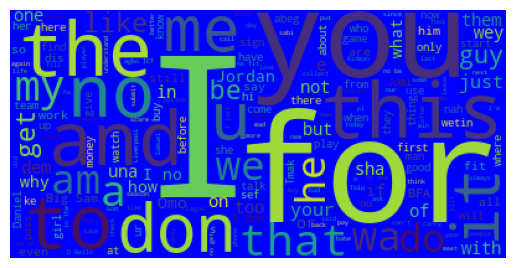

In [217]:
plt.imshow(WordCloud(stopwords=['dey', 'see', 'go', 'na', 'message', 'make', 'wan', 'Afeez', 'need', 'send', 'tell', 'never', 'edited', 'bro'],
 background_color='blue').generate(all_non_media_msgs))
plt.axis('off')

In [20]:
amazon_reviews = pd.read_csv('amazon_reviews.csv')
amazon_reviews['score'].value_counts()

score
0    5097
1    4903
Name: count, dtype: int64

In [21]:
count_vec = CountVectorizer(max_features=1000, max_df=)
amazon_count_vec = count_vec.fit_transform(amazon_reviews['review'])

SyntaxError: invalid syntax (1657297448.py, line 1)

In [22]:
amazon_count_vec.toarray()

NameError: name 'amazon_count_vec' is not defined

In [ ]:
pd.DataFrame(columns=count_vec.get_feature_names_out(),data=amazon_count_vec.toarray())

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']
cv = CountVectorizer()
annak_cv = cv.fit_transform(annak)
pd.DataFrame(columns=cv.get_feature_names_out(),data=annak_cv.toarray())

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,1,1,1,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,2,1


In [24]:
# import pytube
# from pytube import YouTube, request
# url = "https://youtu.be/1aQutbZq0v0?si=GwjFrhOxYSOujOBn"

# yt = YouTube(url)
# yt_stream = yt.streams
# yt_stream = yt.streams.filter(progressive=True, file_extension='mp4').get_highest_resolution()
# yt_stream.download()


In [31]:
len(word_tokenize(amazon_reviews.review[0]))

87

In [82]:
amazon_reviews['word_length'] = amazon_reviews.review.apply(lambda x: len(word_tokenize(x)))
amazon_reviews['lang'] =  amazon_reviews.review.apply(lambda x: detect_langs(x))
reviews_lang = amazon_reviews.review.apply(lambda x: detect_langs(x))
amazon_reviews['detected_lang'] = reviews_lang.apply(lambda x:x[0].lang)

In [87]:
non_english_reviews = amazon_reviews[amazon_reviews['detected_lang'] != 'en']

In [89]:
non_english_reviews.head()

,Unnamed: 0,score,review,word_length,detected_lang
169,169,1,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...,34,de
881,881,1,Good read................. ............... .....,38,cy
1249,1249,1,Il grande ritorno!: E' dai tempi del tour di ...,171,it
1259,1259,1,La reencarnación vista por un científico: El ...,37,es
1260,1260,1,Excelente Libro / Amazing book!!: Este libro ...,114,es


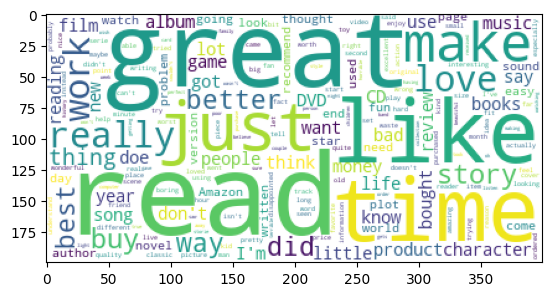

In [124]:
all_reviews_str = ' '.join(amazon_reviews['review'])
ENGLISH_STOP_WORDS = ENGLISH_STOP_WORDS.union(['movie', 'movies', 'book', 'good', 'one'])
plt.imshow(WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white').generate(all_reviews_str))

In [148]:
review_tokens = [word_tokenize(review.lower()) for review in amazon_reviews.review]
# [i for i in amazon_reviews.review]

In [154]:
sum([[len(word) for word in token if word.isalpha() ] for token in  review_tokens][0])

328

In [164]:
len([[len(word) for word in token if word.isalpha() ] for token in  review_tokens][0]) 

78

In [159]:
([[word for word in token if word.isalpha() and word not in ENGLISH_STOP_WORDS] for token in  review_tokens][0]) 

['stuning',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'recomend',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'impress',
 'cares',
 'listen']

In [196]:
clean_review_tokens = [[word for word in token if word.isalpha() and word not in ENGLISH_STOP_WORDS] for token in  review_tokens][0]
clean_review_tokens[:10]

['stuning',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'recomend',
 'people',
 'hate']

In [198]:
eng_stemmer = SnowballStemmer('english')
eng_stemmer.stem('the guy is going to the boxing competition')
[eng_stemmer.stem(word) for word in clean_review_tokens]

['stune',
 'sound',
 'track',
 'beauti',
 'paint',
 'seneri',
 'mind',
 'recomend',
 'peopl',
 'hate',
 'vid',
 'game',
 'music',
 'play',
 'game',
 'chrono',
 'cross',
 'game',
 'play',
 'best',
 'music',
 'back',
 'away',
 'crude',
 'keyboard',
 'take',
 'fresher',
 'step',
 'grate',
 'guitar',
 'soul',
 'orchestra',
 'impress',
 'care',
 'listen']

In [182]:
eng_lemmatizer = WordNetLemmatizer()
# eng_lemmatizer.lemmatize('the guy is going to the boxing competition', pos='adverb')

In [200]:
tdidf_vec = TfidfVectorizer()

In [ ]:
movie_vec = CountVectorizer(max_features=200, stop_words=list(ENGLISH_STOP_WORDS))
reviews_trans = movie_vec.fit_transform(movie_reviews.review)
transfomed_reviews_df = pd.DataFrame(columns=movie_vec.get_feature_names_out(), data=reviews_trans.toarray())
clean_movie_reviews_df = pd.concat([transfomed_reviews_df, movie_reviews.label], axis=1)

In [220]:
X = clean_movie_reviews_df.drop('label', axis=1)
y = clean_movie_reviews_df['label']
logreg = LogisticRegression()
logreg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [224]:
y_pred = logreg.predict(X)
accuracy_score(y, y_pred)

0.7897613651513131

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7568287808127915

In [77]:
group_members = non_media_df['sender'].unique().tolist()
nlp = spacy.load('en_core_web_md')
cleaned_chat = ' '.join([t.lower() for t in non_media_df['message'] if t not in ENGLISH_STOP_WORDS and t not in group_members and t.isalpha()])
doc= nlp(cleaned_chat)

In [80]:
[(ent.text, ent.pos_) for ent in doc]

[('omo', 'INTJ'),
 ('ode', 'PROPN'),
 ('wtf', 'PROPN'),
 ('actually', 'ADV'),
 ('tuff', 'PROPN'),
 ('omooooo', 'VERB'),
 ('ahh', 'PROPN'),
 ('ewww', 'PROPN'),
 ('hollandia', 'PROPN'),
 ('aytbj', 'NOUN'),
 ('abegg', 'NOUN'),
 ('deedii', 'PROPN'),
 ('bruuhh', 'PROPN'),
 ('una', 'PROPN'),
 ('hmm', 'INTJ'),
 ('sure', 'ADJ'),
 ('godddddddd', 'NOUN'),
 ('nah', 'INTJ'),
 ('link', 'NOUN'),
 ('track', 'NOUN'),
 ('same', 'ADJ'),
 ('omo', 'PROPN'),
 ('lmao', 'PROPN'),
 ('omo', 'PROPN'),
 ('okau', 'NOUN'),
 ('aswear', 'NOUN'),
 ('wow', 'INTJ'),
 ('wtf', 'PROPN'),
 ('omoo', 'ADJ'),
 ('bastard', 'PROPN'),
 ('omo', 'PROPN'),
 ('omo', 'PROPN'),
 ('omoo', 'ADJ'),
 ('no', 'DET'),
 ('lol', 'INTJ'),
 ('ehhhhhhhhhhhhhhhhhhhh', 'INTJ'),
 ('okay', 'INTJ'),
 ('ahh', 'INTJ'),
 ('aja', 'PROPN'),
 ('aytbj', 'VERB'),
 ('ayggytbj', 'ADJ'),
 ('olofo', 'NOUN'),
 ('abegg', 'NOUN'),
 ('no', 'INTJ'),
 ('yess', 'INTJ'),
 ('reallll', 'PROPN'),
 ('omo', 'PROPN'),
 ('thanks', 'NOUN'),
 ('lol', 'VERB'),
 ('nvm', 'PROPN'),
 